In [55]:
import pandas as pd

df = pd.read_csv("race:ethnicity.csv")
mdata = pd.read_csv("../Merged Data/result.csv")

data = pd.merge(df, mdata, on='Name')
data.dropna(axis=0, how='any', inplace=True)

data.head()


,Name,Non-Hispanic White alone,Non-Hispanic Black or African American alone,"Non-Hispanic Asian, Native Hawaiian and Pacific Islander alone",Hispanic or Latino,Others,Total,TotChild,OlderAdult,MedIllnes,...,Low_to_No,TotDis,MBTA_Stops_Count,AQI_OZONE,AQI_PM10,AQI_PM2.5,CategoryName_OZONE,CategoryName_PM10,CategoryName_PM2.5,ZipCode
0,Allston,12443.0,1516.0,5194.0,2958.0,891.0,23000.0,173,144,2831.85,...,3300,400,4,34.403509,15.106383,34.196667,Good,Good,Good,2134
1,Back Bay,12361.0,736.0,2028.0,1761.0,597.0,17483.0,1686,3759,11842.96,...,5316,1892,6,34.403509,15.106383,34.196667,Good,Good,Good,2116
3,Brighton,30965.0,2379.0,8046.0,5993.0,2220.0,49603.0,4244,5847,23936.80,...,17067,5502,8,34.403509,15.106383,34.196667,Good,Good,Good,2135
4,Charlestown,14388.0,1220.0,2216.0,1862.0,725.0,20411.0,3301,1811,6461.47,...,4157,1535,2,34.403509,15.106383,32.736667,Good,Good,Good,2129
5,Dorchester,28157.0,51088.0,11250.0,25366.0,9004.0,124865.0,17424,6535,25010.76,...,22749,9819,3,34.403509,15.106383,34.196667,Good,Good,Good,2122


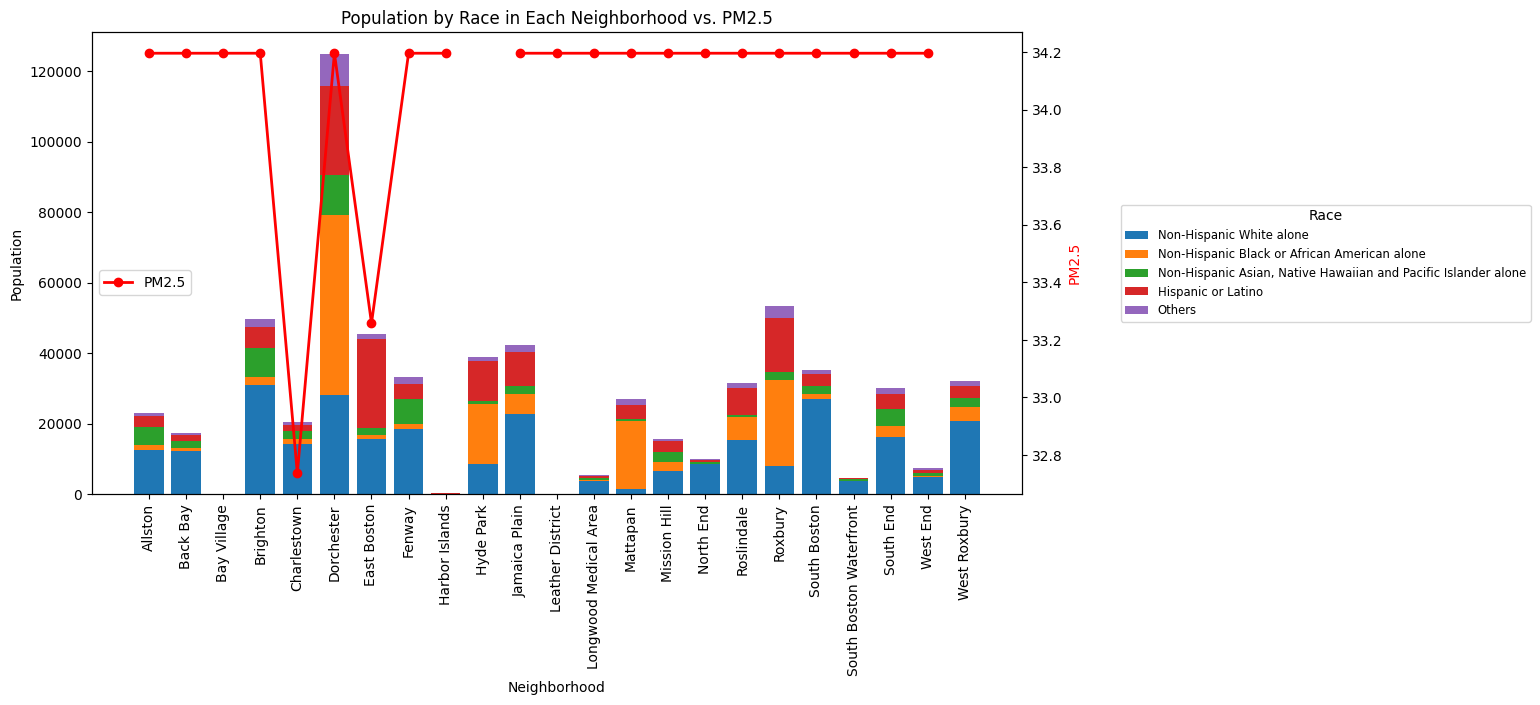

In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("race:ethnicity.csv")
mdata = pd.read_csv("../Merged Data/result.csv")

data = pd.merge(df, mdata, on='Name')

data['Population'] = data['Total']

selected_columns = data[['Name', 'Population', 'AQI_PM2.5']]

race_columns = ['Non-Hispanic White alone', 'Non-Hispanic Black or African American alone', 'Non-Hispanic Asian, Native Hawaiian and Pacific Islander alone', 'Hispanic or Latino', 'Others']

grouped_data = data.groupby('Name')[race_columns].sum()

fig, ax1 = plt.subplots(figsize=(12, 6))  

bottom = 0

legend_labels = []
for race in race_columns:
    ax1.bar(grouped_data.index, grouped_data[race], bottom=bottom, label=race)
    bottom += grouped_data[race]
    legend_labels.append(race)

ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('Population')
ax1.set_title('Population by Race in Each Neighborhood vs. PM2.5')
ax1.set_xticks(grouped_data.index)
ax1.set_xticklabels(grouped_data.index, rotation=90)  

ax1.legend(legend_labels, title="Race", loc="center left", bbox_to_anchor=(1.1, 0.5), fontsize='small')

ax2 = ax1.twinx()
ppi_data = data.groupby('Name')['AQI_PM2.5'].mean()
ax2.plot(ppi_data.index, ppi_data, marker='o', color='red', label='PM2.5', linewidth=2)
ax2.set_ylabel('PM2.5', color='red')

ax2.legend(['PM2.5'], loc="upper left", bbox_to_anchor=(0, 0.5))

plt.show()


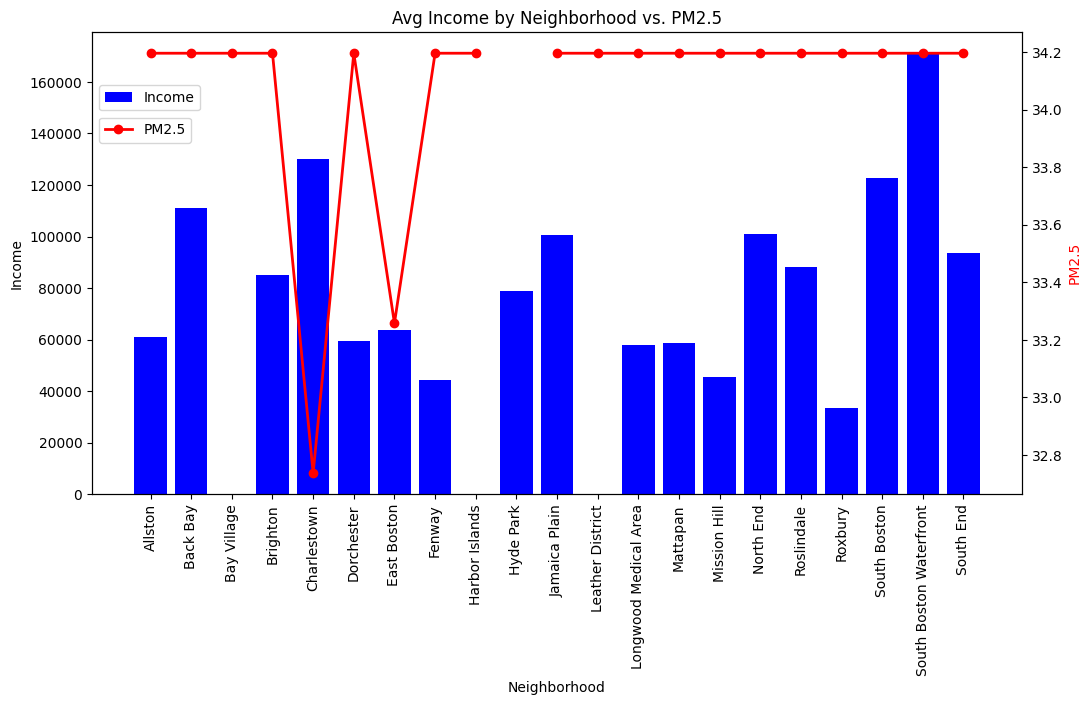

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("income.csv")
mdata = pd.read_csv("../Merged Data/result.csv")

data = pd.merge(df, mdata, on='Name')

data['Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)'] = pd.to_numeric(data['Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)'], errors='coerce', downcast='integer')

selected_columns = data[['Name', 'Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)', 'AQI_PM2.5']]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('Income', color='black')
ax1.set_title('Avg Income by Neighborhood vs. PM2.5')

selected_columns.reset_index(inplace=True, drop=True)

ax1.set_xticks(range(len(selected_columns)))
ax1.set_xticklabels(selected_columns['Name'], rotation=90)

ax1.bar(range(len(selected_columns)), selected_columns['Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)'], color='blue', label='Income')

ax2 = ax1.twinx()

ppi_data = data.groupby('Name')['AQI_PM2.5'].mean()

ax2.plot(range(len(ppi_data)), ppi_data, marker='o', color='red', label='PM2.5', linewidth=2)
ax2.set_ylabel('PM2.5', color='red')

ax1.legend(['Income'], loc="upper left", bbox_to_anchor=(0, 0.9))
ax2.legend(['PM2.5'], loc="upper left", bbox_to_anchor=(0, 0.83))

plt.show()


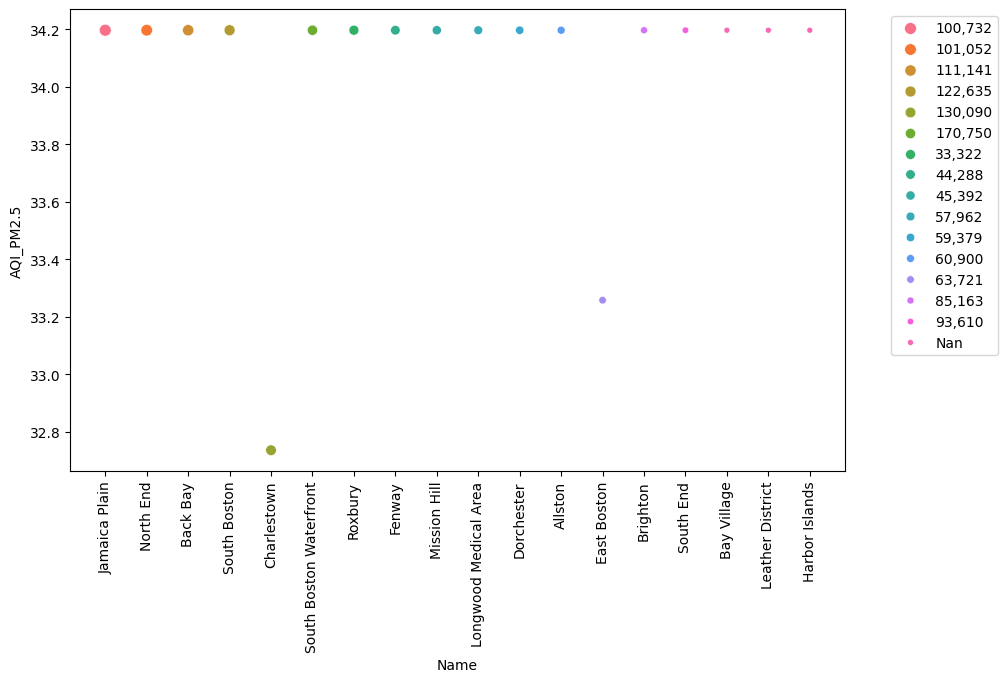

In [89]:
import pandas as pd

df = pd.read_csv("income.csv")
mdata = pd.read_csv("../Merged Data/result.csv")

data = pd.merge(df, mdata, on='Name')
data.dropna(axis=0, how='any', inplace=True)

data.head()

income = data[['Name', 'Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)', 'AQI_PM2.5', 'AQI_PM10', 'AQI_OZONE']]
income.head()

import seaborn as sns
import matplotlib.pyplot as plt

income = income.dropna(subset=['Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)'])
income = income.sort_values(by='Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)')

metric = 'Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=income, x='Name', y='AQI_PM2.5', hue=metric, size=metric)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
